## Aligning bathymetry

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

os.chdir("/lustre_scratch/orlando-code/coralshift/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from coralshift.plotting import spatial_plots
from coralshift.processing import spatial_data

from pathlib import Path
import xarray as xa
import rasterio
from rasterio.merge import merge

ERROR 1: PROJ: proj_create_from_database: Open of /home/jovyan/lustre_scratch/conda-envs/coralshift/share/proj failed


In [6]:
os.chdir("/lustre_scratch/orlando-code/datasets/bathymetry/")
!pwd

/lustre_scratch/orlando-code/datasets/bathymetry


## GBR 30

In [9]:
# path to dataset folder
# bathymetry_dir_path = Path("/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/temp_datasets/bathymetry")
gbr_30_dir_p = Path("GBR_30m")

In [22]:
# open 30m tifs into memory for merging: in the end this just takes too long and isn't scalable. Need to sort out batching. 
tifs_fp_list = [file for file in (gbr_30_dir_p).glob("*.tif")]
open_tifs = []

# for fp in tifs_fp_list:
#     src = rasterio.open(fp)
#     open_tifs.append(src)

# Can't be handled within 60GB of RAM
# mosaic, out_trans = merge(open_tifs[2:4])

## GEBCO

In [20]:
gebco_xa

<xarray.DataArray 'elevation' (latitude: 7200, longitude: 4800)>
dask.array<xarray-<this-array>, shape=(7200, 4800), dtype=int16, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -40.0 -39.99 -39.99 ... -10.01 -10.01 -10.0
  * longitude  (longitude) float64 140.0 140.0 140.0 140.0 ... 160.0 160.0 160.0
    crs        int64 0
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

(<Figure size 1000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'elevation at 0.0042° (~452 m) resolution'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
 <cartopy.mpl.geocollection.GeoQuadMesh at 0x7fa008c75a80>)

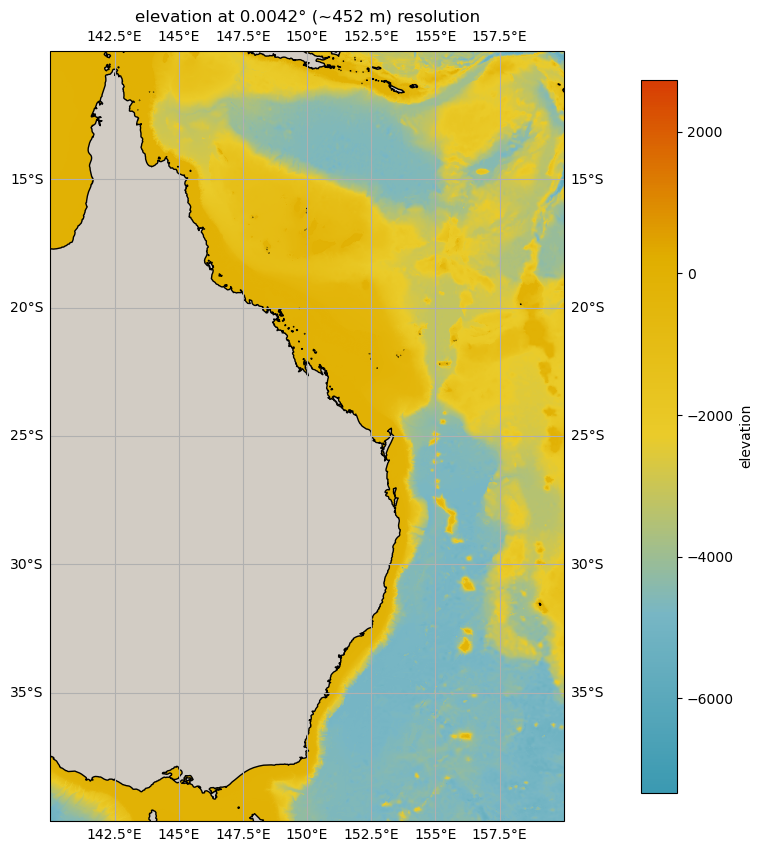

In [21]:
# GEBCO
gebco_f_path = "gebco/gebco_2023_n-10.0_s-40.0_w140.0_e160.0.nc"

# TODO: processing not working properly e.g. wrt crs
gebco_xa = spatial_data.process_xa_d(xa.open_dataarray(gebco_f_path))
# gebco_nc["elevation"].plot()
spatial_plots.plot_spatial(gebco_nc)

In [ ]:
# import rioxarray as rio


# def chunk_as_necessary(
#     xa_d: xa.DataArray | xa.Dataset, chunk_dict: dict
# ) -> xa.DataArray | xa.Dataset:
#     """
#     Chunk the input xarray DataArray or Dataset along the specified dimensions according to the given chunk dictionary.

#     Parameters
#     -----------
#         xa_d (xa.DataArray or xa.Dataset): The xarray DataArray or Dataset to be chunked.
#         chunk_dict (dict): A dictionary specifying the chunk size for each dimension.
#                            The keys are the dimension names, and the values are the desired chunk sizes.
#                            If a dimension is not present in the dictionary or its value is None,
#                            that dimension will not be chunked.

#     Returns
#     -------
#         xa.DataArray or xa.Dataset: The chunked xarray DataArray or Dataset.

#     """
#     # set up to chunk relevant coordinates
#     dims_to_chunk = {dim: chunk_dict.get(dim, None) for dim in xa_d.dims}
#     return xa_d.chunk(dims_to_chunk)


# def process_xa_d(
#     xa_d: xa.Dataset | xa.DataArray,
#     rename_mapping: dict = {
#         "lat": "latitude",
#         "lon": "longitude",
#         "y": "latitude",
#         "x": "longitude",
#     },
#     squeeze_coords: str | list[str] = None,
#     chunk_dict: dict = {"latitude": 100, "longitude": 100, "time": 100},
#     crs: str = "EPSG:4326",
# ):
#     """
#     Process the input xarray Dataset or DataArray by standardizing coordinate names, squeezing dimensions,
#     chunking along specified dimensions, and sorting coordinates.

#     Parameters
#     ----------
#         xa_d (xa.Dataset or xa.DataArray): The xarray Dataset or DataArray to be processed.
#         rename_mapping (dict, optional): A dictionary specifying the mapping for coordinate renaming.
#             The keys are the existing coordinate names, and the values are the desired names.
#             Defaults to a mapping that standardizes common coordinate names.
#         squeeze_coords (str or list of str, optional): The coordinates to squeeze by removing size-1 dimensions.
#                                                       Defaults to ['band'].
#         chunk_dict (dict, optional): A dictionary specifying the chunk size for each dimension.
#                                      The keys are the dimension names, and the values are the desired chunk sizes.
#                                      Defaults to {'latitude': 100, 'longitude': 100, 'time': 100}.

#     Returns
#     -------
#         xa.Dataset or xa.DataArray: The processed xarray Dataset or DataArray.

#     """
#     temp_xa_d = xa_d.copy()

#     for coord, new_coord in rename_mapping.items():
#         if new_coord not in temp_xa_d.coords and coord in temp_xa_d.coords:
#             temp_xa_d = temp_xa_d.rename({coord: new_coord})

#     # should these be less catch-all?
#     if "band" in temp_xa_d.dims:
#         temp_xa_d = temp_xa_d.squeeze("band")
#     if squeeze_coords:
#         temp_xa_d = temp_xa_d.squeeze(squeeze_coords)
#     if "time" in temp_xa_d.dims:
#         temp_xa_d = temp_xa_d.transpose("time", "latitude", "longitude", ...)
#     else:
#         temp_xa_d = temp_xa_d.transpose("latitude", "longitude")
#     if "grid_mapping" in xa_d.attrs:
#         del xa_d.attrs["grid_mapping"]
        
#     # add crs
#     # temp_xa_d.rio.write_crs(crs, inplace=True)
#     chunked_xa_d = chunk_as_necessary(temp_xa_d, chunk_dict)
#     # sort coords by ascending values
#     return chunked_xa_d.sortby(list(temp_xa_d.dims))